In [9]:
import mlflow
import matplotlib.pyplot as plt
import numpy as np

In [12]:
runs = mlflow.search_runs(experiment_ids='329')
runs=runs[runs['params.adaptive_lambda_p']=='True']
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.integrated_squared_prediction_error,metrics.mse_from_sample,metrics.hausdorff_distance_ratio,metrics.optimal_relative_lambda,...,params.cross_validation,tags.mlflow.source.git.commit,tags.mlflow.source.type,tags.mlflow.runName,tags.Cross_Validation,tags.mlflow.user,tags.mlflow.note.content,tags.Adaptive,tags.mlflow.source.name,tags.Status
0,4bd010cd968b4b50a22abb4cf130664b,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 01:28:43.476000+00:00,2023-02-15 01:28:43.542000+00:00,0.010354,0.008930,4.989247,0.038768,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,melodic-squirrel-580,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
1,f4653da475d94473b6410790ab57c2e1,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 01:27:36.906000+00:00,2023-02-15 01:27:36.992000+00:00,0.010343,0.011037,15.285714,0.085166,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,gregarious-conch-700,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
2,e5a2bd2f60a4450cbb83215ab3ea2f46,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 01:26:19.869000+00:00,2023-02-15 01:26:19.945000+00:00,0.010209,0.008794,0.571429,0.108334,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,gregarious-mink-898,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
3,b0b925475e454b53bdf3651c69eb2e2f,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 01:25:08.414000+00:00,2023-02-15 01:25:08.503000+00:00,0.010340,0.010887,1.000000,0.115871,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,gaudy-eel-21,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
4,a71e997b88e44edb80f514e807bb7487,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-15 01:23:56.131000+00:00,2023-02-15 01:23:56.199000+00:00,0.010075,0.010450,2.583333,0.111245,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,kindly-ant-830,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,9b84328887084594bb31d1d726c6e254,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-14 21:15:42.504000+00:00,2023-02-14 21:15:42.579000+00:00,0.011568,0.166762,0.868534,6.080750,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,unique-dolphin-675,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
231,e26c70f5977f461c9c82e940b57f3cef,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-14 21:14:29.403000+00:00,2023-02-14 21:14:29.463000+00:00,0.013302,0.129597,1.000000,0.235974,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,traveling-sow-333,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
232,2877ac5a932e4d1d8ae4645152ba1fb0,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-14 21:13:02.458000+00:00,2023-02-14 21:13:02.582000+00:00,0.010930,0.151623,0.285714,0.755731,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,mysterious-flea-965,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved
233,a6fce052f0a848d7836b26e74c3f0464,329,FINISHED,file:///home/jbohne/sbu/research/Adaptive_Sign...,2023-02-14 21:11:38.481000+00:00,2023-02-14 21:11:38.538000+00:00,0.011949,0.150780,1.110000,0.622030,...,True,5288d4784f3733c0d064cacc61505e22f5e657e4,LOCAL,redolent-newt-851,True,jbohne,Linear Trend Filtering on Noisy Sample with Cr...,True,run_bulk_tf.py,solved


In [33]:
snr=runs['params.signal_to_noise'].values
bandwidth=runs['metrics.bandwidth'].values

mse_ratio=runs['metrics.mse_true_ratio'].values

unique_snr=np.unique(snr)
unique_bandwidth=np.unique(bandwidth)



mse_ratio=mse_ratio.reshape(unique_snr.shape[0],unique_bandwidth.shape[0],5)
mse_ratio=np.mean(mse_ratio,axis=2)

mse_ratio=mse_ratio.T


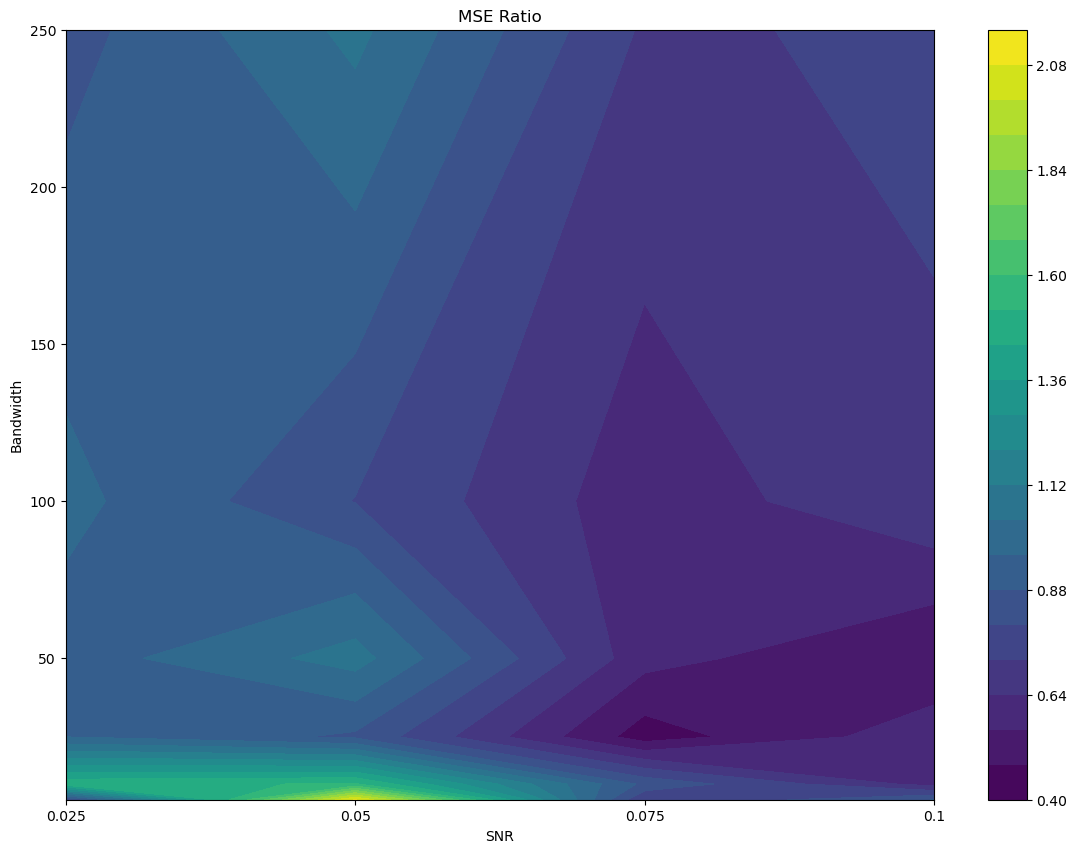

In [34]:
fig,ax=plt.subplots(figsize=(14,10))
plt.contourf(unique_snr,unique_bandwidth,mse_ratio,levels=20)
plt.colorbar()
plt.xlabel('SNR')
plt.ylabel('Bandwidth')
plt.title('MSE Ratio')
plt.show()
